### This jupyter notebook contains practical assignment for the lesson "EDA - Data Cleaning"

**Author : Umidjon Sattorov. Machine Learning**

In [1]:
# Import necessary libraries
import pandas as pd

In [56]:
# Load dataframe from local file automobile.csv
aut = pd.read_csv("./automobile.csv")
aut.tail(9)

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
52,70,toyota,wagon,95.7,NaN,NaN,four,62.0,27.0,7898.0
53,71,toyota,wagon,95.7,169.7,ohc,four,NaN,27.0,8778.0
54,79,toyota,wagon,104.5,187.8,dohc,six,156.0,NaN,15750.0
55,80,volkswagen,sedan,97.3,NaN,ohc,four,NaN,37.0,7775.0
56,81,volkswagen,sedan,97.3,171.7,ohc,four,85.0,27.0,7975.0
57,82,volkswagen,sedan,NaN,171.7,NaN,four,52.0,37.0,7995.0
58,86,volkswagen,sedan,97.3,NaN,ohc,four,100.0,NaN,9995.0
59,87,volvo,sedan,104.3,188.8,NaN,four,114.0,23.0,12940.0
60,88,volvo,wagon,104.3,188.8,ohc,four,NaN,23.0,13415.0


In [42]:
aut.shape

(61, 10)

* Написать код, который проверяет наличие дубликатов в датасете

In [43]:
# Your code goes here
aut.duplicated().sum()

np.int64(0)

* Если есть какие-либо дублированные значения, выведите их в консоль.

In [44]:
# Your code goes here
aut[aut.duplicated()]

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price


* Проверьте, сколько значений NaN существует в датасете.

In [45]:
# Your code goes here
aut.isna().sum()

index                0
company              0
body-style           0
wheel-base          15
length              13
engine-type         12
num-of-cylinders     0
horsepower          16
average-mileage     15
price                3
dtype: int64

In [68]:
%pip install missingno

import missingno as msno

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


* Визуализируйте значения NaN с помощью библиотеки missingno.

<Axes: >

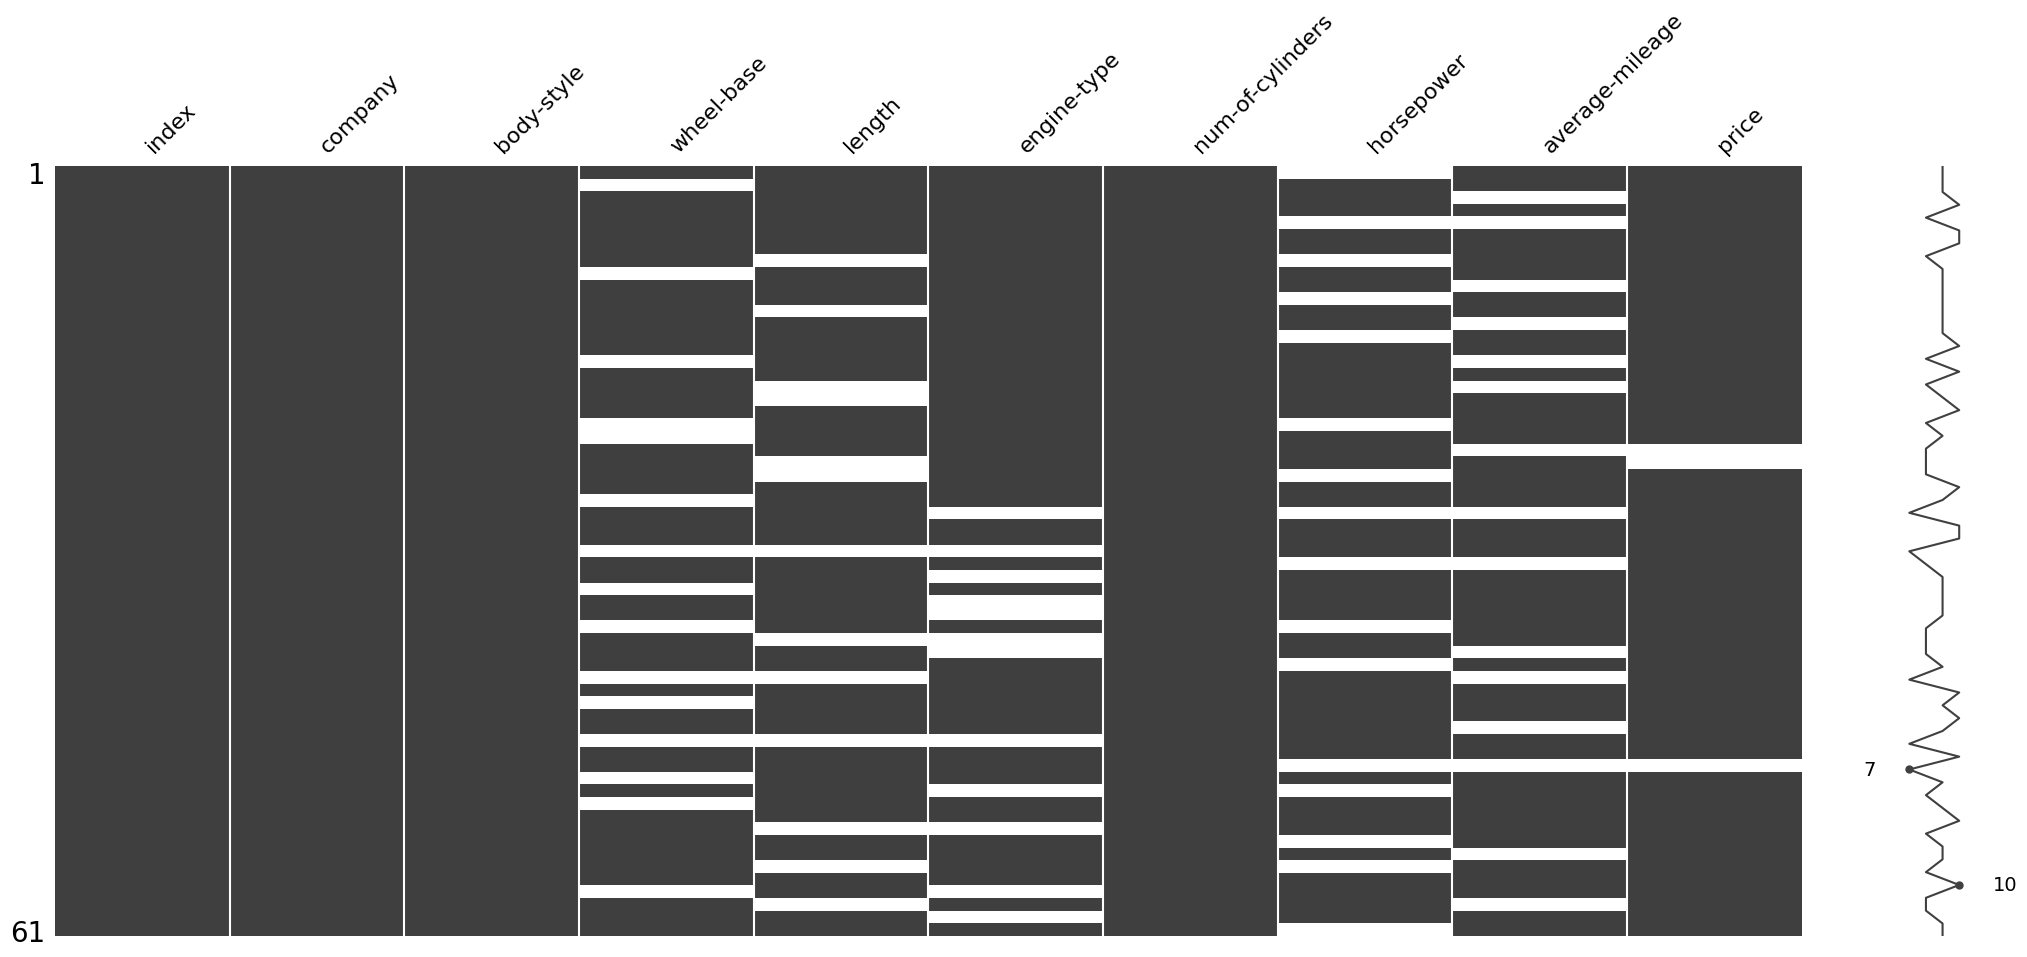

In [47]:
# Your code goes here
msno.matrix(aut)

* Удалите все значения **NaN** из датасета с помощью команды **dropna** и сохраните результат в переменной **new\_df**.


In [48]:
# Your code goes here
new_aut = aut.dropna()

In [49]:
new_aut.isna().sum()

index               0
company             0
body-style          0
wheel-base          0
length              0
engine-type         0
num-of-cylinders    0
horsepower          0
average-mileage     0
price               0
dtype: int64

* Вычислите, какой процент данных останется, если удалить все значения **NaN**.


In [50]:
# Your code goes here
new_aut = ((aut.isna().sum() / len(aut) * 100)).sort_values(ascending = False)
new_aut

horsepower          26.229508
wheel-base          24.590164
average-mileage     24.590164
length              21.311475
engine-type         19.672131
price                4.918033
company              0.000000
index                0.000000
body-style           0.000000
num-of-cylinders     0.000000
dtype: float64

In [65]:
aut.isna().sum()

index                0
company              0
body-style           0
wheel-base           0
length              13
engine-type         12
num-of-cylinders     0
horsepower           0
average-mileage     15
price                3
dtype: int64

* Заполните значения в столбцах wheel-base и average-mileage средними значениями этих столбцов.

In [57]:
# Your code goes here
aut['wheel-base'] = aut['wheel-base'].fillna(aut['wheel-base'].mean())
aut.isna().sum()

index                0
company              0
body-style           0
wheel-base           0
length              13
engine-type         12
num-of-cylinders     0
horsepower          16
average-mileage     15
price                3
dtype: int64

* Так как модели автомобилей очень похожи друг на друга, я думаю, будет лучше заполнить столбец engine-type методом ffill. Сделайте это в следующей ячейке.

In [60]:
# Your code goes here
aut['horsepower']=aut['horsepower'].fillna(method = 'bfill')
aut['horsepower']=aut['horsepower'].fillna(method = 'ffill')
aut

C:\Users\sagdiana\AppData\Local\Temp\ipykernel_14588\3667601874.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  aut['horsepower']=aut['horsepower'].fillna(method = 'bfill')
C:\Users\sagdiana\AppData\Local\Temp\ipykernel_14588\3667601874.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  aut['horsepower']=aut['horsepower'].fillna(method = 'ffill')


,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,alfa-romero,convertible,88.600000,168.8,dohc,four,111.0,21.0,13495.0
1,1,alfa-romero,convertible,99.219565,168.8,dohc,four,111.0,21.0,16500.0
2,2,alfa-romero,hatchback,94.500000,171.2,ohcv,six,154.0,NaN,16500.0
3,3,audi,sedan,99.800000,176.6,ohc,four,102.0,24.0,13950.0
4,4,audi,sedan,99.400000,176.6,ohc,five,110.0,NaN,17450.0
...,...,...,...,...,...,...,...,...,...,...
56,81,volkswagen,sedan,97.300000,171.7,ohc,four,85.0,27.0,7975.0
57,82,volkswagen,sedan,99.219565,171.7,NaN,four,52.0,37.0,7995.0
58,86,volkswagen,sedan,97.300000,NaN,ohc,four,100.0,NaN,9995.0
59,87,volvo,sedan,104.300000,188.8,NaN,four,114.0,23.0,12940.0


In [61]:
aut.isna().sum()

index                0
company              0
body-style           0
wheel-base           0
length              13
engine-type         12
num-of-cylinders     0
horsepower           0
average-mileage     15
price                3
dtype: int64

* Для заполнения пропущенных значений в horsepower эффективнее использовать метод bfill. Используйте его и заполните пропущенные значения в horsepower этим методом.

* Для length будет лучше, если мы заполним медианным значением каждой модели автомобиля. Заполните значения для length медианным значением существующих моделей автомобилей.

In [ ]:
# Your code goes here


* Заполните значения NaN в столбце price средней ценой существующих моделей автомобилей. Пожалуйста, не заполняйте их просто средней ценой по всему датасету.

In [ ]:
# Your code goes here


____

### Выполните те же операции для датасета titanic.csv, но для заполнения пустых значений выберите наиболее подходящий метод, который считаете лучшим.

In [104]:
titanic = pd.read_csv("./titanic.csv")
titanic.head(35)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [93]:
titanic.shape

(891, 12)

In [94]:
titanic.duplicated().sum()

np.int64(0)

In [95]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

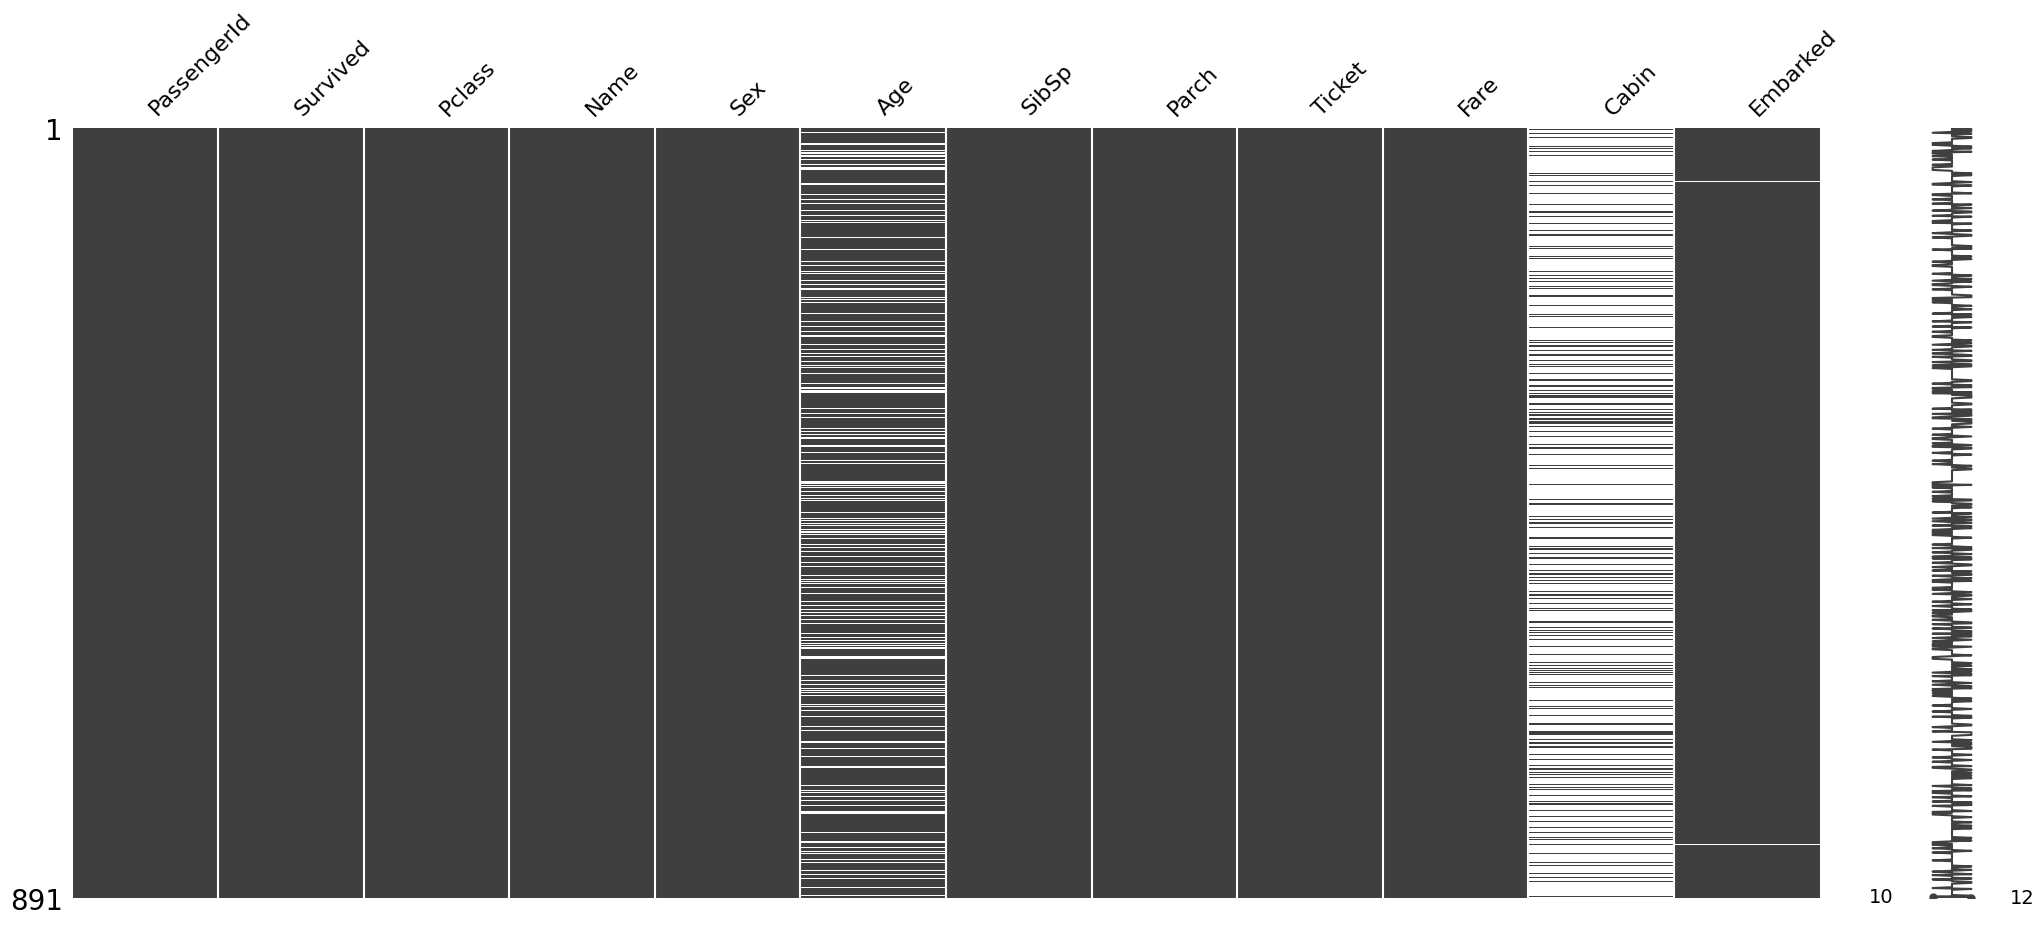

In [96]:
msno.matrix(titanic)

In [110]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,29.699118,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,29.699118,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,29.699118,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,29.699118,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,29.699118,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,29.699118,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,29.699118,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,29.699118,0,0,111369,30.0000,C148,C


In [118]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [112]:
titanic = titanic.fillna({'Cabin' : 'other'})
titanic['Cabin']

0      other
1        C85
2      other
3       C123
4      other
       ...  
886    other
887      B42
888    other
889     C148
890    other
Name: Cabin, Length: 891, dtype: object

In [117]:
titanic['Embarked'] = titanic['Embarked'].fillna(method = 'ffill')

C:\Users\sagdiana\AppData\Local\Temp\ipykernel_14588\2586110126.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  titanic['Embarked'] = titanic['Embarked'].fillna(method = 'ffill')


In [120]:
titanic.head(11)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,29.699118,1,0,A/5 21171,7.2500,other,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,29.699118,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,29.699118,0,0,STON/O2. 3101282,7.9250,other,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,29.699118,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,29.699118,0,0,373450,8.0500,other,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,other,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,29.699118,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,29.699118,3,1,349909,21.0750,other,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,29.699118,0,2,347742,11.1333,other,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,29.699118,1,0,237736,30.0708,other,C


In [122]:
titanic.loc[27]

PassengerId                                28
Survived                                    0
Pclass                                      1
Name           Fortune, Mr. Charles Alexander
Sex                                      male
Age                                 29.699118
SibSp                                       3
Parch                                       2
Ticket                                  19950
Fare                                    263.0
Cabin                             C23 C25 C27
Embarked                                    S
Name: 27, dtype: object